# Thuật toán Nadam optimizer
+ B1:  Đầu tiên ta khởi tạo m =0, n = 0 tương ứng với momentum tích lũy các tham số theo từng bước và momentum tại ví trí tiếp theo dựa trên vị trí hiện tại.
+ B2: Tính đạo hàm gradient descent:
  + g(t) = f'(x(t-1))
+ B3: Cập nhật các tham số:
  + m(t) = mu * m(t-1) + (1-mu) * g(t)
  + n(t) = nu * n(t-1) + (1-nu) * g(t)^2
  + m_hat = [(mu * m(t) / (1 - mu))] +  [(1 - mu) * g(t)/ (1 - mu)]
  + n_hat = nu * n(t) / (1-nu)
+ B4 : Tính giá trị cho tham số:
  + x(t) = x(t-1) - α / (sqrt(n_hat) + eps) * mhat

+ Lưu ý:
  + α : Learning rate
  + mu : hệ số phân rã ( beta1 trong Adam) giá trị điển hình là 0.975
  + nu : Hệ số phân rã ( beta2 trong Adam) giá trị điển hình là 0.999

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def objective(x,y):
  return x**2.0 + y**2.0
def derivative(x,y):
  return np.asarray([x*2.0, y*2.0])

In [4]:
def NadamOptimizer(objective, derivative, bounds, n_iter, alpha, mu, nu, eps=1e-8):
  solutions = list()
  x = bounds[:,0] + np.random.rand(len(bounds)) * (bounds[:,1] - bounds[:,0])
  scores = objective(x[0], x[1])

  m = [0.0 for _ in range(bounds.shape[0])]
  n = [0.0 for _ in range(bounds.shape[0])]

  for t in range(n_iter):
    g = derivative(x[0], x[1])

    for i in range(bounds.shape[0]):
      m[i] = mu * m[i] + (1.0 - mu) * g[i]
      n[i] = nu * n[i] + (1.0 - nu) * g[i]**2.0

      m_hat = (mu * m[i] / ( 1.0 - mu)) + ((1.0 - mu) * g[i] / (1.0 - mu))
      n_hat = nu * n[i] /(1.0 - nu)

      x[i] = x[i] - alpha / (np.sqrt(n_hat) + eps) * m_hat

      score = objective(x[0], x[1])
      solutions.append(x.copy())
  return solutions

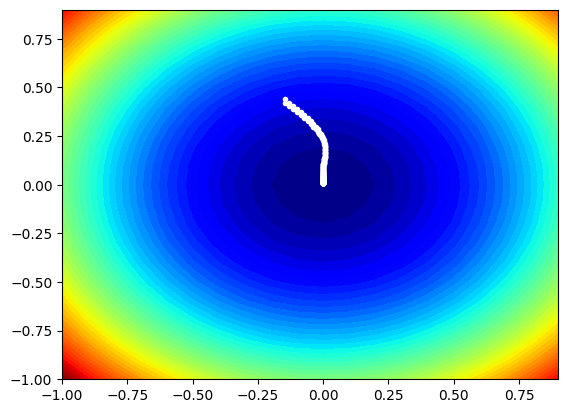

In [8]:
np.random.seed(1)

bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 100
alpha = 0.01
mu = 0.8
nu = 0.999
eps = 1e-8
solutions = NadamOptimizer(objective, derivative, bounds, n_iter, alpha, mu, nu,eps)

xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)

solutions = np.asarray(solutions)
x, y = np.meshgrid(xaxis, yaxis)
results = objective(x,y)
plt.plot(solutions[:,0], solutions[:,1], '.-', color ='w')
plt.contourf(x, y, results, levels=50, cmap='jet')
plt.show()